In [1]:
import numpy as np
from scipy.signal import butter,filtfilt
import plotly
import plotly.graph_objects as go

# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz

nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [2]:
# sin wave
t = np.arange(0, T, 1/fs);
sig = np.sin(1.2*2*np.pi*t)# Lets add some noise
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = sig + noise

In [3]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

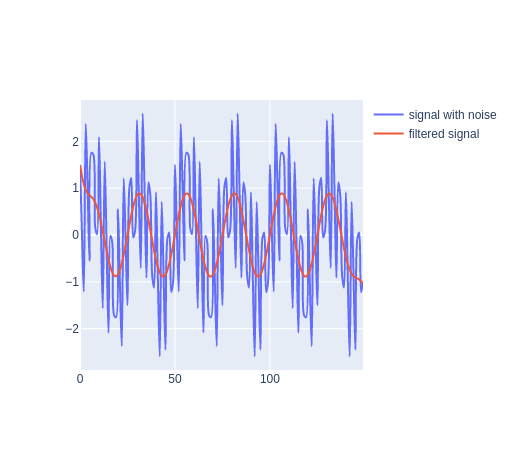

In [4]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

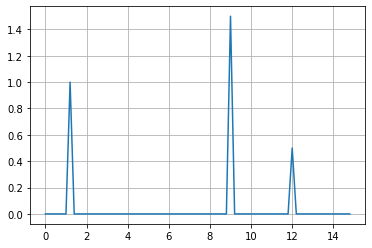

In [6]:
from scipy.fft import fft, fftfreq
y_fft = fft(data)
x_fft = fftfreq(n, 1/fs)[:n//2]
import matplotlib.pyplot as plt
plt.plot(x_fft, 2.0/n * np.abs(y_fft[0:n//2]))
plt.grid()
plt.show()